In [68]:
import numpy as np
import matplotlib.pyplot as plt
figure_size = (6,4)

In [69]:
import os
import numpy as np
import pandas as pd

class Velocity_Profile:
    def __init__(self, directory):
        self.directory = directory
        self.coefficients = np.loadtxt('polynomial_coefficients.txt')
        self.mean_voltages = []
        self.y_vals = []
        self.y = []
        self.figsize = (8, 6)
        self.read_files()

    def read_files(self):
        first = True
        for filename in os.listdir(self.directory):
            if os.path.isfile(os.path.join(self.directory, filename)):
                # Process the file here
                data = pd.read_csv(os.path.join(self.directory, filename))   
                voltages = data.iloc[:, 1]
                velocities = np.polyval(self.coefficients, voltages)

                if first:
                    self.u = velocities
                    first = False
                else:
                    self.u = np.vstack((self.u,velocities))

                y_val = ''
                for i, letter in enumerate(filename):
                    if filename[i] == 'y' and filename[i+1] == '=':
                        while filename[i+2].isdigit() or filename[i+2]==',':
                            if filename[i+2]==',':
                                y_val += '.'
                            else:
                                y_val += filename[i+2]
                            i += 1
                        self.y_vals.append(float(y_val))

        self.u_mean = np.mean(self.u, axis=1)
        self.u_std = np.std(self.u, axis=1)

        sorted_indices = np.argsort(self.y_vals)
        self.y_vals = np.array(self.y_vals)[sorted_indices]
        self.u_mean = np.array(self.u_mean)[sorted_indices]
        self.u_std = np.array(self.u_std)[sorted_indices]

    def plot(self):
        # Plot the points and the fitted curve
        plt.figure(figsize=self.figsize)
        plt.scatter(self.y_vals, self.u_mean, label='Data points', color='blue')
        plt.errorbar(self.y_vals, self.u_mean, yerr=self.u_std, fmt='none', color='black',  capsize=2, label='Uncertainty')
        plt.legend()
        plt.ylim(0, max(self.u_mean + self.u_std)*1.3)
        plt.xlabel('y [mm]')
        plt.ylabel('Velocity [m/s]')
        plt.grid()
        plt.show()
        
        
        


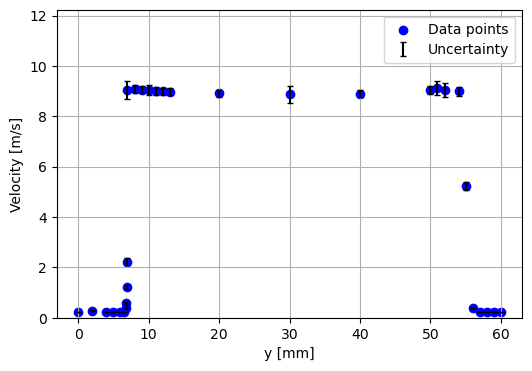

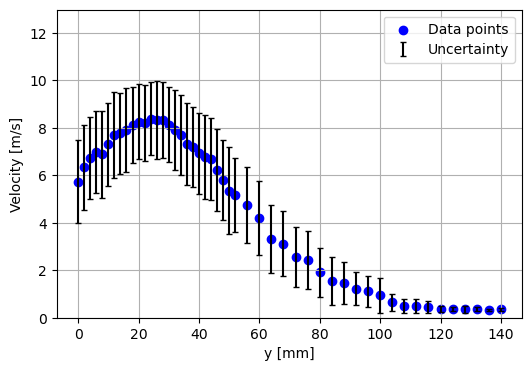

In [70]:
top_hat = Velocity_Profile("Measurement\Data\Profile1")
top_hat.plot()

bell_profile = Velocity_Profile("Measurement\Data\Profile2")
bell_profile.plot()
